# Project Milestone 2: Multi-Object Detection with Multiple Models
## Complete Training Pipeline & Performance Comparison

### 📋 Project Requirements:
1. ✅ Generate 100+ multi-object images
2. ✅ Train multiple deep learning models
3. ✅ Document all models and their performance
4. ✅ Identify the best model for the dataset

### 🎯 Models to Test:
1. **YOLOv8n** (Nano) - Fastest, smallest
2. **YOLOv8s** (Small) - Balanced speed/accuracy
3. **YOLOv8m** (Medium) - Higher accuracy
4. **YOLOv8 with different hyperparameters** - Optimization

This notebook will:
- Train all models
- Compare performance metrics
- Generate visualizations
- Create data for your report


## Step 1: Setup & Install Dependencies

In [1]:
# Install required packages
!pip install -q ultralytics opencv-python-headless matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 80.2 MB/s eta 0:00:00


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from ultralytics import YOLO
import json
from datetime import datetime

print("✅ All imports successful!")

✅ All imports successful!


## Step 2: Configuration

In [7]:
# CONFIGURE YOUR PATHS
DATASET_PATH = '/content/drive/MyDrive/Output_Folder_YoLo'  # Path to your generated dataset
DATA_YAML = f"{DATASET_PATH}/data.yaml"

# Training configuration
EPOCHS = 50  # Number of training epochs
BATCH_SIZE = 16  # Adjust based on GPU memory
IMAGE_SIZE = 640  # Standard YOLO size

# Results directory
RESULTS_DIR = "/content/model_results"
os.makedirs(RESULTS_DIR, exist_ok=True)

print(f"📁 Dataset: {DATASET_PATH}")
print(f"📁 Results: {RESULTS_DIR}")
print(f"⚙️  Training config: {EPOCHS} epochs, batch size {BATCH_SIZE}")

📁 Dataset: /content/drive/MyDrive/Output_Folder_YoLo
📁 Results: /content/model_results
⚙️  Training config: 50 epochs, batch size 16


## Step 3: Verify Dataset

In [8]:
# Check dataset structure
print("📊 Dataset Structure:")
!ls -lh {DATASET_PATH}

print("\n📄 Data YAML:")
!cat {DATA_YAML}

# Count images
train_images = len(list(Path(f"{DATASET_PATH}/visualizations/Training").glob("*.jpg")))
val_images = len(list(Path(f"{DATASET_PATH}/visualizations/Validation").glob("*.jpg")))

print(f"\n✅ Training images: {train_images}")
print(f"✅ Validation images: {val_images}")
print(f"✅ Total: {train_images + val_images}")

📊 Dataset Structure:
total 17K
-rw------- 1 root root  650 Feb  7 23:57  data.yaml
drwx------ 2 root root 4.0K Feb 28 22:46  Group5
drwx------ 4 root root 4.0K Feb 28 22:46  images
drwx------ 4 root root 4.0K Feb 28 22:46  labels
drwx------ 2 root root 4.0K Feb 28 22:46 'Test Files'

📄 Data YAML:
# YOLOv8 Dataset Configuration
# Auto-generated grid-based multi-object dataset

path: /content/drive/MyDrive/Output_Folder_YoLo
train: images/train
val: images/val

# Number of classes
nc: 39

# Class names (OBJ IDs like OBJ021, OBJ022, etc.)
names: ['OBJ786', 'OBJ788', 'OBJ789', 'OBJ069', 'OBJ007', 'OBJ027', 'OBJ090', 'OBJ787', 'OBJ001', 'OBJ002', 'OBJ003', 'OBJ004', 'OBJ005', 'OBJ006', 'OBJ008', 'OBJ009', 'OBJ010', 'OBJ012', 'OBJ016', 'OBJ018', 'OBJ019', 'OBJ021', 'OBJ022', 'OBJ028', 'OBJ029', 'OBJ031', 'OBJ061', 'OBJ095', 'OBJ107', 'OBJ108', 'OBJ111', 'OBJ159', 'OBJ208', 'OBJ222', 'OBJ229', 'OBJ230', 'OBJ311', 'OBJ405', 'images_OBJ_300']

✅ Training images: 0
✅ Validation images: 0
✅ Total

## Step 4: Train Multiple Models

### 🎯 Interview Key Point:
**Why test multiple models?**
- Different model sizes offer speed/accuracy trade-offs
- Nano (n): Fastest, suitable for edge devices
- Small (s): Balanced, good for most applications
- Medium (m): Highest accuracy, requires more compute

In [9]:
# Dictionary to store results
model_results = {}

def train_and_evaluate(model_name, model_path, project_name):
    """
    Train a YOLO model and return its performance metrics.
    """
    print(f"\n{'='*60}")
    print(f"🚀 Training {model_name}")
    print(f"{'='*60}")

    # Load model
    model = YOLO(model_path)

    # Train
    results = model.train(
        data=DATA_YAML,
        epochs=EPOCHS,
        imgsz=IMAGE_SIZE,
        batch=BATCH_SIZE,
        name=project_name,
        patience=10,
        save=True,
        plots=True,
        verbose=True
    )

    # Validate
    metrics = model.val()

    # Extract key metrics
    result_data = {
        'model_name': model_name,
        'mAP50': float(metrics.box.map50),
        'mAP50-95': float(metrics.box.map),
        'precision': float(metrics.box.mp),
        'recall': float(metrics.box.mr),
        'model_path': f"runs/detect/{project_name}/weights/best.pt",
        'parameters': model.model.model[-1].np  # Number of parameters
    }

    print(f"\n✅ {model_name} Training Complete!")
    print(f"   mAP@0.5: {result_data['mAP50']:.3f}")
    print(f"   mAP@0.5:0.95: {result_data['mAP50-95']:.3f}")
    print(f"   Precision: {result_data['precision']:.3f}")
    print(f"   Recall: {result_data['recall']:.3f}")

    return result_data

print("✅ Training function ready!")

✅ Training function ready!


### Model 1: YOLOv8 Nano (Fastest)

In [10]:
model_results['yolov8n'] = train_and_evaluate(
    model_name='YOLOv8 Nano',
    model_path='yolov8n.pt',
    project_name='yolov8n_detection'
)


🚀 Training YOLOv8 Nano
Ultralytics 8.4.19 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Output_Folder_YoLo/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolov8n_detection, nbs=64, nms=False, opset=None, optimize=False, op

### Model 2: YOLOv8 Small (Balanced)

In [11]:
model_results['yolov8s'] = train_and_evaluate(
    model_name='YOLOv8 Small',
    model_path='yolov8s.pt',
    project_name='yolov8s_detection'
)


🚀 Training YOLOv8 Small
Ultralytics 8.4.19 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Output_Folder_YoLo/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolov8s_detection, nbs=64, nms=False, opset=None, optimize=False, o

### Model 3: YOLOv8 Medium (Most Accurate)

In [12]:
model_results['yolov8m'] = train_and_evaluate(
    model_name='YOLOv8 Medium',
    model_path='yolov8m.pt',
    project_name='yolov8m_detection'
)


🚀 Training YOLOv8 Medium
Ultralytics 8.4.19 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Output_Folder_YoLo/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolov8m_detection, nbs=64, nms=False, opset=None, optimize=False, 

### Model 4: YOLOv8 Nano with Optimized Hyperparameters

In [13]:
# Train with data augmentation and optimized parameters
print(f"\n{'='*60}")
print(f"🚀 Training YOLOv8 Nano (Optimized)")
print(f"{'='*60}")

model = YOLO('yolov8n.pt')

results = model.train(
    data=DATA_YAML,
    epochs=EPOCHS,
    imgsz=IMAGE_SIZE,
    batch=BATCH_SIZE,
    name='yolov8n_optimized',
    patience=15,  # More patience
    save=True,
    plots=True,
    # Augmentation parameters
    hsv_h=0.015,  # HSV-Hue augmentation
    hsv_s=0.7,    # HSV-Saturation
    hsv_v=0.4,    # HSV-Value
    degrees=10.0,  # Rotation
    translate=0.1, # Translation
    scale=0.5,     # Scaling
    fliplr=0.5,    # Horizontal flip
    mosaic=1.0,    # Mosaic augmentation
    # Optimization
    optimizer='AdamW',
    lr0=0.001,     # Initial learning rate
    verbose=True
)

metrics = model.val()

model_results['yolov8n_optimized'] = {
    'model_name': 'YOLOv8 Nano (Optimized)',
    'mAP50': float(metrics.box.map50),
    'mAP50-95': float(metrics.box.map),
    'precision': float(metrics.box.mp),
    'recall': float(metrics.box.mr),
    'model_path': 'runs/detect/yolov8n_optimized/weights/best.pt',
    'parameters': model.model.model[-1].np
}

print(f"\n✅ Optimized Model Training Complete!")
print(f"   mAP@0.5: {model_results['yolov8n_optimized']['mAP50']:.3f}")
print(f"   mAP@0.5:0.95: {model_results['yolov8n_optimized']['mAP50-95']:.3f}")


🚀 Training YOLOv8 Nano (Optimized)
Ultralytics 8.4.19 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Output_Folder_YoLo/data.yaml, degrees=10.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolov8n_optimized, nbs=64, nms=False, opset=None, opti

## Step 5: Compare All Models

In [14]:
# Create comparison DataFrame
df_results = pd.DataFrame(model_results).T

print("\n" + "="*80)
print("📊 MODEL PERFORMANCE COMPARISON")
print("="*80)
print(df_results.to_string())
print("="*80)

# Save to CSV for report
df_results.to_csv(f"{RESULTS_DIR}/model_comparison.csv")
print(f"\n✅ Results saved to: {RESULTS_DIR}/model_comparison.csv")


📊 MODEL PERFORMANCE COMPARISON
                                model_name     mAP50  mAP50-95 precision    recall                                     model_path parameters
yolov8n                        YOLOv8 Nano  0.822413  0.817112  0.753113  0.723449  runs/detect/yolov8n_detection/weights/best.pt     758917
yolov8s                       YOLOv8 Small  0.988722   0.98676  0.952626  0.949467  runs/detect/yolov8s_detection/weights/best.pt    2131141
yolov8m                      YOLOv8 Medium  0.988529  0.987778  0.965502  0.953369  runs/detect/yolov8m_detection/weights/best.pt    3798277
yolov8n_optimized  YOLOv8 Nano (Optimized)  0.948669  0.945078  0.873959   0.88131  runs/detect/yolov8n_optimized/weights/best.pt     758917

✅ Results saved to: /content/model_results/model_comparison.csv


## Step 6: Visualize Performance Comparison

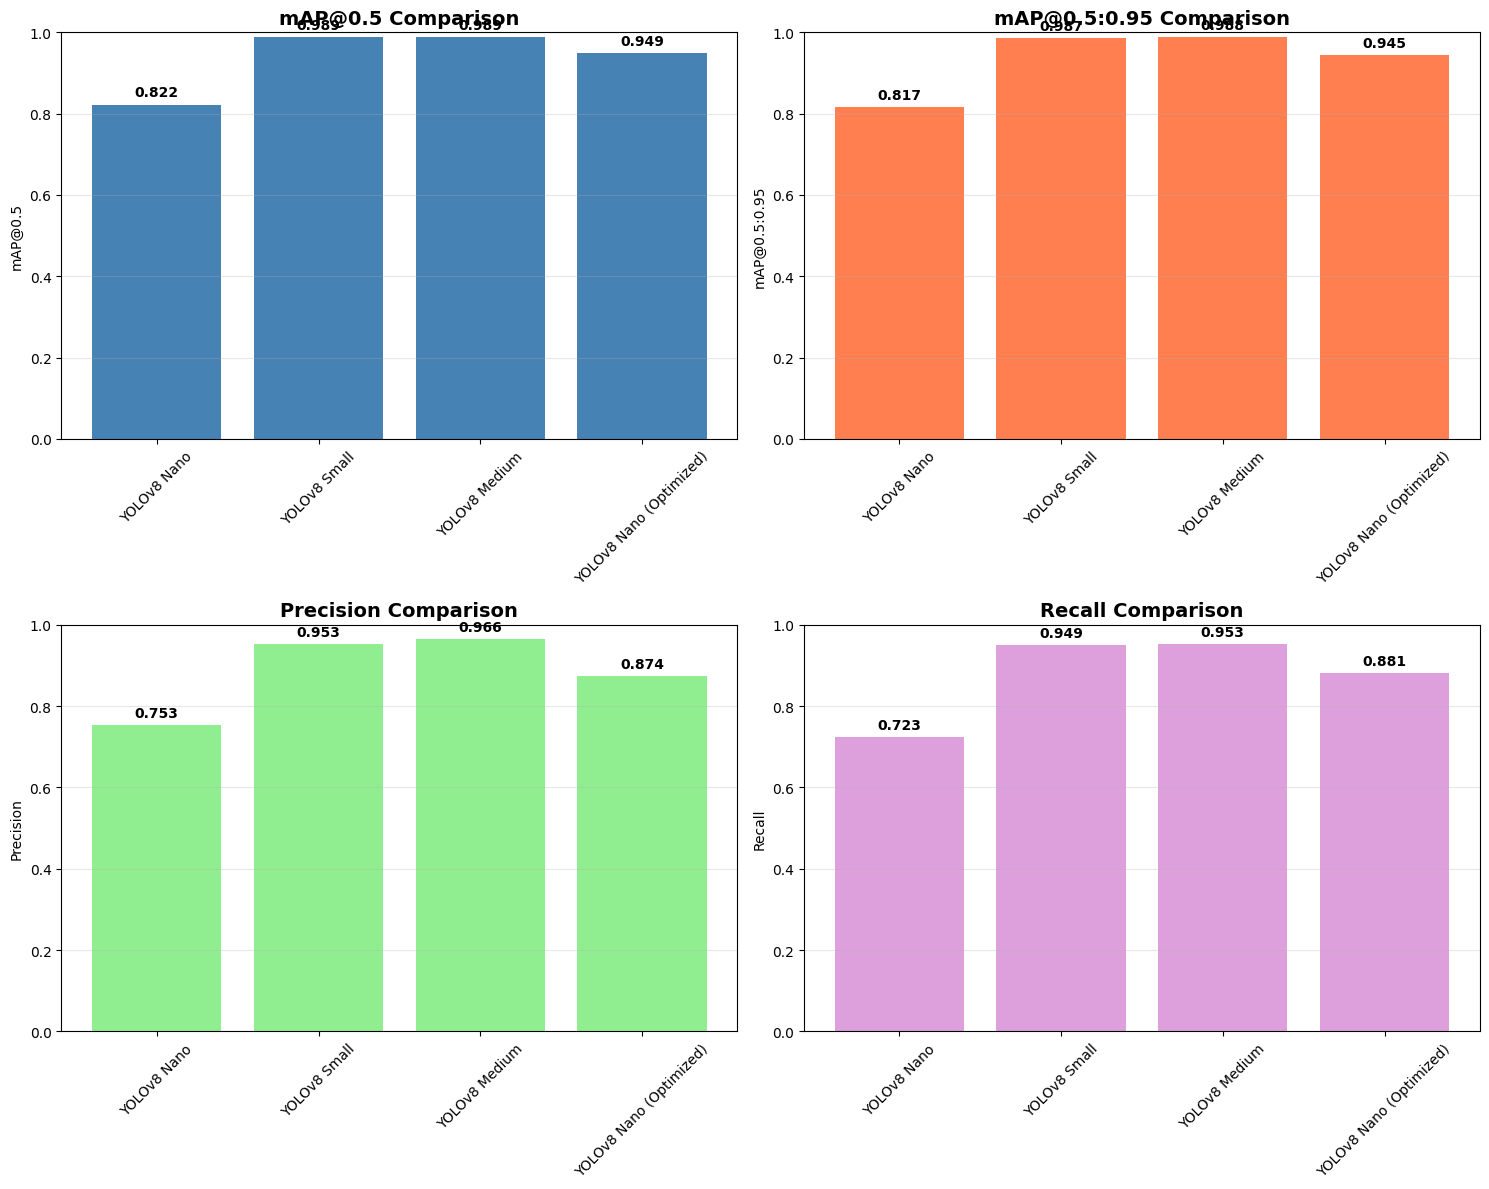

✅ Comparison plot saved to: /content/model_results/model_comparison.png


In [15]:
# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: mAP@0.5
axes[0, 0].bar(df_results['model_name'], df_results['mAP50'], color='steelblue')
axes[0, 0].set_title('mAP@0.5 Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('mAP@0.5')
axes[0, 0].set_ylim([0, 1])
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(df_results['mAP50']):
    axes[0, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Plot 2: mAP@0.5:0.95
axes[0, 1].bar(df_results['model_name'], df_results['mAP50-95'], color='coral')
axes[0, 1].set_title('mAP@0.5:0.95 Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('mAP@0.5:0.95')
axes[0, 1].set_ylim([0, 1])
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

for i, v in enumerate(df_results['mAP50-95']):
    axes[0, 1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Plot 3: Precision
axes[1, 0].bar(df_results['model_name'], df_results['precision'], color='lightgreen')
axes[1, 0].set_title('Precision Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_ylim([0, 1])
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(df_results['precision']):
    axes[1, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Plot 4: Recall
axes[1, 1].bar(df_results['model_name'], df_results['recall'], color='plum')
axes[1, 1].set_title('Recall Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].set_ylim([0, 1])
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

for i, v in enumerate(df_results['recall']):
    axes[1, 1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig(f"{RESULTS_DIR}/model_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Comparison plot saved to: {RESULTS_DIR}/model_comparison.png")

## Step 7: Identify Best Model

In [16]:
# Find best model based on mAP@0.5:0.95
best_model_idx = df_results['mAP50-95'].idxmax()
best_model = df_results.loc[best_model_idx]

print("\n" + "="*80)
print("🏆 BEST MODEL IDENTIFIED")
print("="*80)
print(f"\nModel: {best_model['model_name']}")
print(f"\nPerformance Metrics:")
print(f"  • mAP@0.5: {best_model['mAP50']:.3f}")
print(f"  • mAP@0.5:0.95: {best_model['mAP50-95']:.3f}")
print(f"  • Precision: {best_model['precision']:.3f}")
print(f"  • Recall: {best_model['recall']:.3f}")
print(f"  • Model Path: {best_model['model_path']}")
print("\n" + "="*80)

# Save best model info
with open(f"{RESULTS_DIR}/best_model.txt", 'w') as f:
    f.write(f"Best Model: {best_model['model_name']}\n")
    f.write(f"mAP@0.5: {best_model['mAP50']:.3f}\n")
    f.write(f"mAP@0.5:0.95: {best_model['mAP50-95']:.3f}\n")
    f.write(f"Precision: {best_model['precision']:.3f}\n")
    f.write(f"Recall: {best_model['recall']:.3f}\n")
    f.write(f"Model Path: {best_model['model_path']}\n")


🏆 BEST MODEL IDENTIFIED

Model: YOLOv8 Medium

Performance Metrics:
  • mAP@0.5: 0.989
  • mAP@0.5:0.95: 0.988
  • Precision: 0.966
  • Recall: 0.953
  • Model Path: runs/detect/yolov8m_detection/weights/best.pt



---
## Step 8: Test Best Model on Sample Images

In [17]:
# Define class_names from the data.yaml file
import yaml

yaml_path = f"{DATASET_PATH}/data.yaml"

with open(yaml_path, 'r') as f:
    data_config = yaml.safe_load(f)

class_names = data_config['names']
num_classes = data_config['nc']

print(f"✅ Loaded {num_classes} class names:")
print(f"   {class_names}")

✅ Loaded 39 class names:
   ['OBJ786', 'OBJ788', 'OBJ789', 'OBJ069', 'OBJ007', 'OBJ027', 'OBJ090', 'OBJ787', 'OBJ001', 'OBJ002', 'OBJ003', 'OBJ004', 'OBJ005', 'OBJ006', 'OBJ008', 'OBJ009', 'OBJ010', 'OBJ012', 'OBJ016', 'OBJ018', 'OBJ019', 'OBJ021', 'OBJ022', 'OBJ028', 'OBJ029', 'OBJ031', 'OBJ061', 'OBJ095', 'OBJ107', 'OBJ108', 'OBJ111', 'OBJ159', 'OBJ208', 'OBJ222', 'OBJ229', 'OBJ230', 'OBJ311', 'OBJ405', 'images_OBJ_300']


🎲 Testing on 2 random images from 20 total


🎲 Random Image 1: val_0019.jpg
   ✅ Detected 10 object(s):

      Object 1: OBJ786 (99.91%)
      Object 2: OBJ006 (99.45%)
      Object 3: OBJ311 (99.13%)
      Object 4: OBJ788 (99.04%)
      Object 5: OBJ005 (98.01%)
      Object 6: OBJ003 (97.83%)
      Object 7: OBJ229 (97.49%)
      Object 8: OBJ002 (97.20%)
      Object 9: images_OBJ_300 (96.30%)
      Object 10: OBJ012 (94.86%)


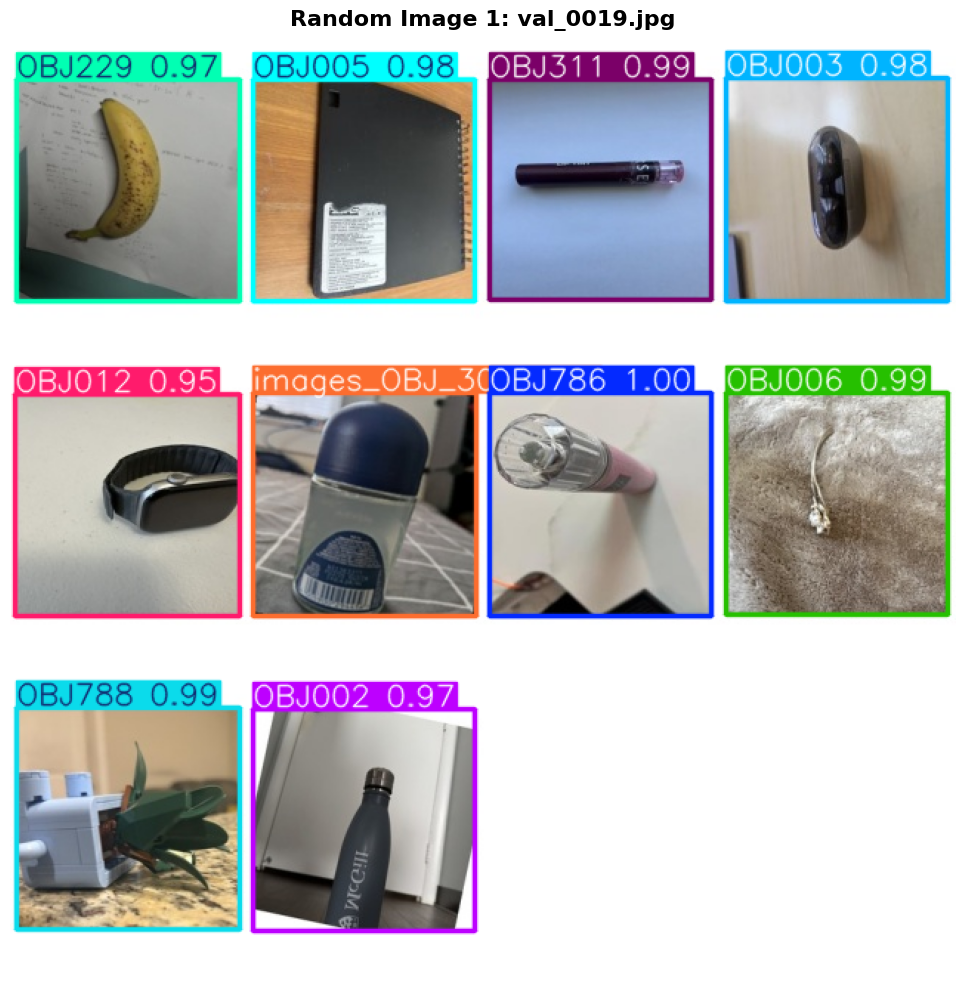


🎲 Random Image 2: val_0001.jpg
   ✅ Detected 8 object(s):

      Object 1: OBJ090 (99.52%)
      Object 2: OBJ111 (99.38%)
      Object 3: OBJ107 (99.37%)
      Object 4: OBJ069 (99.34%)
      Object 5: OBJ008 (98.71%)
      Object 6: OBJ031 (98.05%)
      Object 7: OBJ018 (97.94%)
      Object 8: OBJ008 (59.67%)


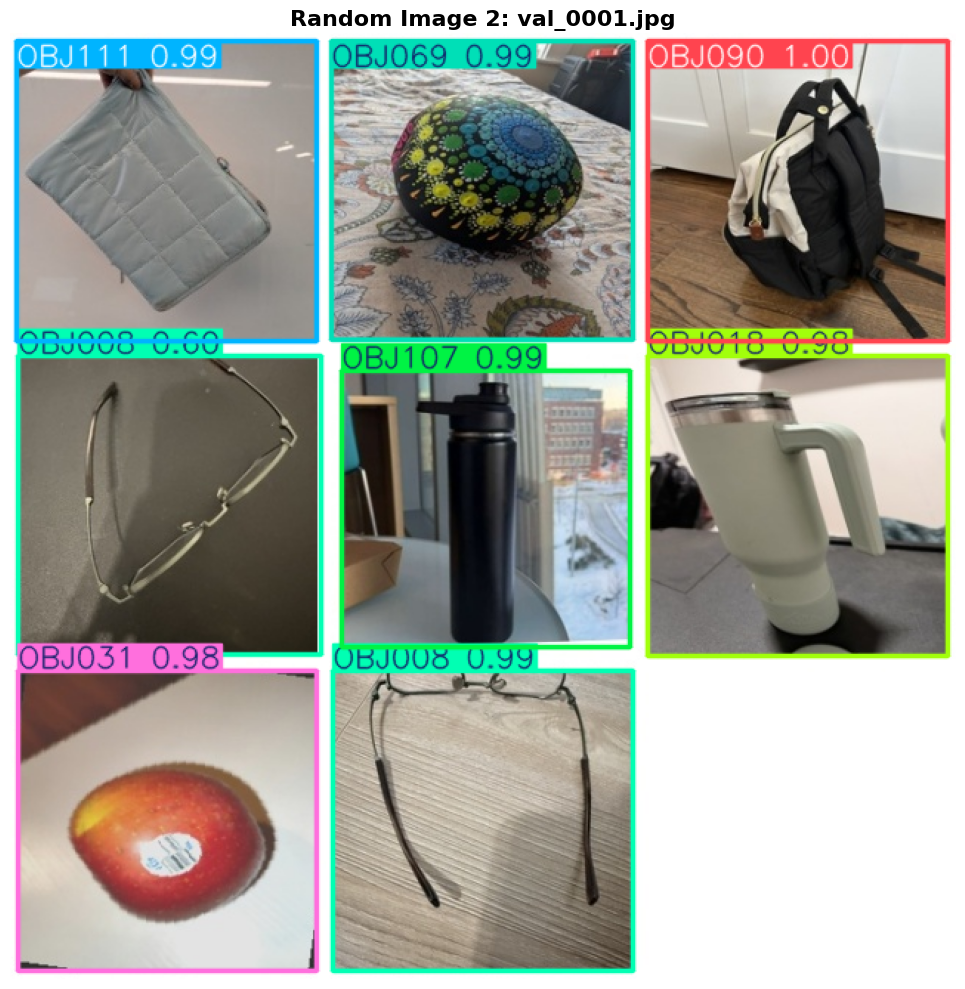


✅ All predictions complete!


In [18]:
# ================================
# TEST ON 2 RANDOM IMAGES
# ================================

import yaml
import random

# Load class names
yaml_path = "/content/drive/MyDrive/Output_Folder_YoLo/data.yaml"
with open(yaml_path, 'r') as f:
    data_config = yaml.safe_load(f)
class_names = data_config['names']

# Load model
model = YOLO(best_model['model_path'])

# Get images
val_image_dir = Path("/content/drive/MyDrive/Output_Folder_YoLo/images/val")
all_images = list(val_image_dir.glob("*.jpg")) + list(val_image_dir.glob("*.png"))

# Pick 2 random images
num_test = 2
random_images = random.sample(all_images, min(num_test, len(all_images)))

print(f"🎲 Testing on {len(random_images)} random images from {len(all_images)} total\n")

for idx, selected_image in enumerate(random_images, 1):
    print(f"\n{'='*60}")
    print(f"🎲 Random Image {idx}: {selected_image.name}")
    print("="*60)

    # Predict
    results = model.predict(source=str(selected_image), conf=0.25, save=False, verbose=False)
    boxes = results[0].boxes

    if len(boxes) == 0:
        print("   ⚠️ No objects detected!")
    else:
        print(f"   ✅ Detected {len(boxes)} object(s):\n")

        for i, box in enumerate(boxes, 1):
            class_id = int(box.cls[0])
            confidence = float(box.conf[0])
            class_name = class_names[class_id]

            print(f"      Object {i}: {class_name} ({confidence:.2%})")

    # Show image
    annotated_img = cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 10))
    plt.imshow(annotated_img)
    plt.title(f"Random Image {idx}: {selected_image.name}", fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

print("\n✅ All predictions complete!")

## Single Object Detection

✅ Model loaded: YOLOv8 Medium
📋 Known classes (39): ['OBJ786', 'OBJ788', 'OBJ789', 'OBJ069', 'OBJ007', 'OBJ027', 'OBJ090', 'OBJ787', 'OBJ001', 'OBJ002', 'OBJ003', 'OBJ004', 'OBJ005', 'OBJ006', 'OBJ008', 'OBJ009', 'OBJ010', 'OBJ012', 'OBJ016', 'OBJ018', 'OBJ019', 'OBJ021', 'OBJ022', 'OBJ028', 'OBJ029', 'OBJ031', 'OBJ061', 'OBJ095', 'OBJ107', 'OBJ108', 'OBJ111', 'OBJ159', 'OBJ208', 'OBJ222', 'OBJ229', 'OBJ230', 'OBJ311', 'OBJ405', 'images_OBJ_300']

📂 Upload an image (should contain only 1 object)...


Saving IMG_E4610.jpg to IMG_E4610 (1).jpg
✅ Image: IMG_E4610 (1).jpg (224x224 px)

🔍 All predictions (conf≥0.01):
   [0] class_id=0 | name=OBJ786 | conf=0.0123
   [1] class_id=0 | name=OBJ786 | conf=0.0111
──────────────────────────────────────────────────

⚠️  Low confidence warning: 1.23%
   The model is uncertain — consider retraining with more images.
ℹ️  2 boxes found; showing the highest-confidence one.

🏆 BEST DETECTION
   Object ID   : 0
   Class Name  : OBJ786
   Confidence  : 1.23%
   Bounding Box: [0, 0, 172, 210]


/tmp/ipython-input-4778/2369814705.py:110: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4778/2369814705.py:111: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.savefig(f"{RESULTS_DIR}/single_object_{filename}", dpi=200, bbox_inches='tight')
/tmp/ipython-input-4778/2369814705.py:111: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.savefig(f"{RESULTS_DIR}/single_object_{filename}", dpi=200, bbox_inches='tight')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


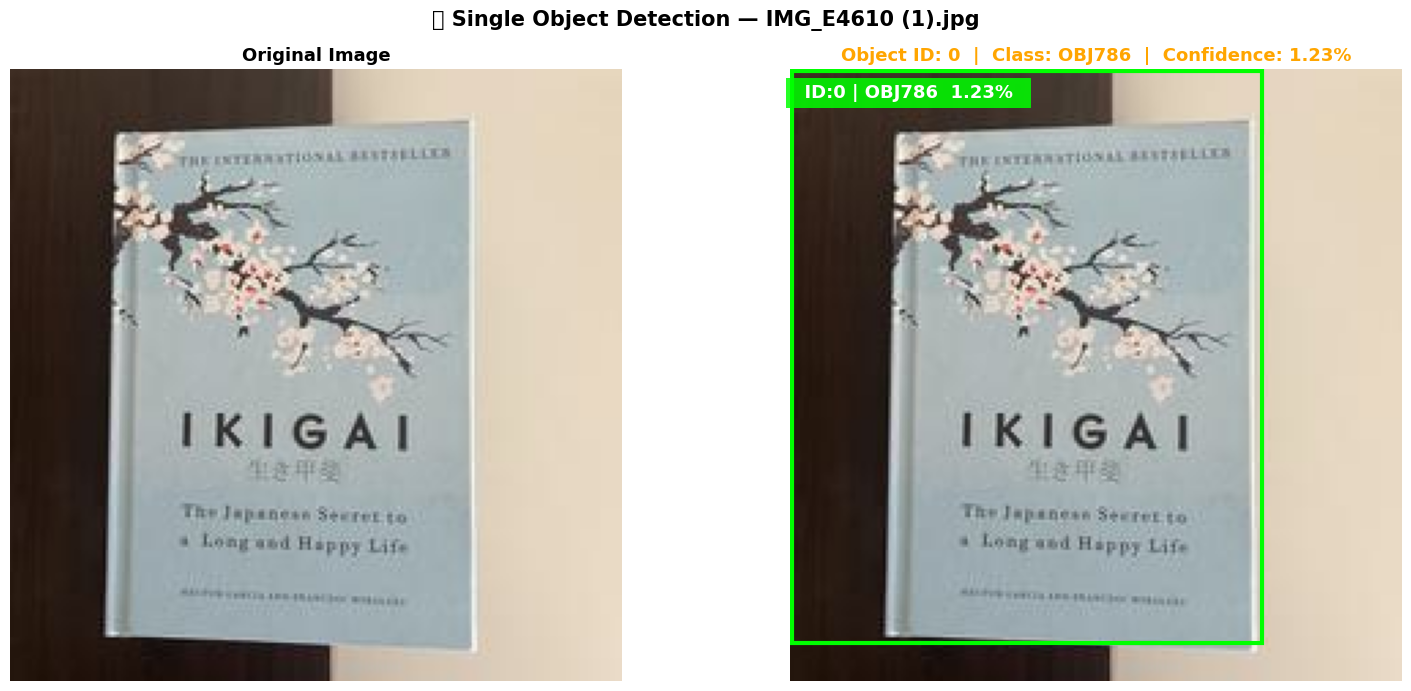


✅ Saved to: /content/model_results/single_object_IMG_E4610 (1).jpg


In [53]:
# ============================================================
# 🎯 SINGLE OBJECT DETECTION WITH OBJECT ID
# ============================================================
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import cv2
import io
import yaml
from ultralytics import YOLO

# Load class names
yaml_path = f"{DATASET_PATH}/data.yaml"
with open(yaml_path, 'r') as f:
    data_config = yaml.safe_load(f)
class_names = data_config['names']

# Load best model
model = YOLO(best_model['model_path'])
print(f"✅ Model loaded: {best_model['model_name']}")
print(f"📋 Known classes ({len(model.names)}): {list(model.names.values())}")

# Upload image
print("\n📂 Upload an image (should contain only 1 object)...")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
image = Image.open(io.BytesIO(uploaded[filename])).convert("RGB")
print(f"✅ Image: {filename} ({image.size[0]}x{image.size[1]} px)")

# ── Detection at very low confidence to capture weak predictions ───────────
CONF_THRESHOLD = 0.01   # Low threshold to account for underconfident model
results = model(image, conf=CONF_THRESHOLD, imgsz=640, verbose=False)
boxes   = results[0].boxes

# ── Print all raw predictions ───────────────────────────────────────────────
print(f"\n🔍 All predictions (conf≥{CONF_THRESHOLD}):")
if len(boxes) == 0:
    print("   ⚠️ Nothing detected at all — model may not have seen this class in training.")
else:
    for i, b in enumerate(boxes):
        cid  = int(b.cls[0])
        conf = float(b.conf[0])
        print(f"   [{i}] class_id={cid} | name={class_names[cid]} | conf={conf:.4f}")
print("─" * 50)

# ── Pick the BEST (highest confidence) box ─────────────────────────────────
if len(boxes) == 0:
    print("\n⚠️ No object detected.")
    print("💡 Tip: Your model confidence is very low (~0.01–0.02).")
    print("   This suggests the model needs more training data or more epochs.")
    plt.figure(figsize=(7, 6))
    plt.imshow(np.array(image))
    plt.title("No Object Detected", color='red', fontsize=14)
    plt.axis('off')
    plt.show()

else:
    # Sort by confidence descending, pick the top box
    confs      = boxes.conf.tolist()
    best_idx   = int(np.argmax(confs))

    x1, y1, x2, y2 = boxes.xyxy[best_idx].tolist()
    confidence = float(boxes.conf[best_idx])
    class_id   = int(boxes.cls[best_idx])
    label      = class_names[class_id]

    # Warn if confidence is suspiciously low
    if confidence < 0.10:
        print(f"\n⚠️  Low confidence warning: {confidence:.2%}")
        print("   The model is uncertain — consider retraining with more images.")

    if len(boxes) > 1:
        print(f"ℹ️  {len(boxes)} boxes found; showing the highest-confidence one.")

    print(f"\n{'='*45}")
    print(f"🏆 BEST DETECTION")
    print(f"{'='*45}")
    print(f"   Object ID   : {class_id}")
    print(f"   Class Name  : {label}")
    print(f"   Confidence  : {confidence:.2%}")
    print(f"   Bounding Box: [{x1:.0f}, {y1:.0f}, {x2:.0f}, {y2:.0f}]")
    print(f"{'='*45}")

    # ── Plot ────────────────────────────────────────────────────────────────
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))

    axes[0].imshow(np.array(image))
    axes[0].set_title("Original Image", fontsize=13, fontweight='bold')
    axes[0].axis('off')

    axes[1].imshow(np.array(image))
    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1,
                               linewidth=3, edgecolor='lime', facecolor='none')
    axes[1].add_patch(rect)
    axes[1].text(x1, max(y1-12, 10),
                 f"  ID:{class_id} | {label}  {confidence:.2%}  ",
                 color='white', fontsize=13, fontweight='bold',
                 bbox=dict(facecolor='lime', alpha=0.85, pad=4, edgecolor='none'))
    axes[1].set_title(
        f"Object ID: {class_id}  |  Class: {label}  |  Confidence: {confidence:.2%}",
        fontsize=13, fontweight='bold',
        color='green' if confidence >= 0.10 else 'orange'
    )
    axes[1].axis('off')

    plt.suptitle(f"🎯 Single Object Detection — {filename}", fontsize=15, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f"{RESULTS_DIR}/single_object_{filename}", dpi=200, bbox_inches='tight')
    plt.show()
    print(f"\n✅ Saved to: {RESULTS_DIR}/single_object_{filename}")

## Multi-Object Detection

📂 Please upload your images for prediction...


Saving Multi1.jpeg to Multi1 (2).jpeg
✅ Uploaded: Multi1 (2).jpeg

🎯 Running predictions on 1 uploaded image(s)...


image 1/1 /content/Multi1 (2).jpeg: 640x640 1 OBJ786, 1 OBJ788, 1 OBJ787, 1 OBJ001, 1 OBJ002, 1 OBJ003, 2 OBJ004s, 1 OBJ012, 1 OBJ016, 1 OBJ018, 2 OBJ021s, 1 OBJ022, 1 OBJ107, 1 OBJ159, 2 OBJ222s, 36.9ms
Speed: 1.5ms preprocess, 36.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Image 1: Multi1 (2).jpeg
  • Detected: Class 33, Confidence: 0.99
  • Detected: Class 0, Confidence: 0.99
  • Detected: Class 8, Confidence: 0.98
  • Detected: Class 31, Confidence: 0.98
  • Detected: Class 22, Confidence: 0.97
  • Detected: Class 9, Confidence: 0.94
  • Detected: Class 17, Confidence: 0.93
  • Detected: Class 21, Confidence: 0.92
  • Detected: Class 19, Confidence: 0.92
  • Detected: Class 7, Confidence: 0.91
  • Detected: Class 11, Confidence: 0.88
  • Detected: Class 1, Confidence: 0.86
  • Detected: Class 21, Confidence: 0.86
  • Detected: Class 11, Confi

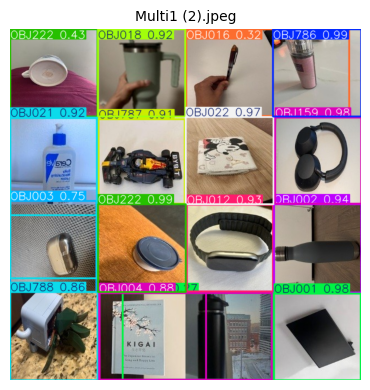

✅ Predictions saved to: /content/model_results/sample_predictions.png


In [60]:
# ✅ Upload images directly instead of reading from Drive
from google.colab import files
from PIL import Image
import io

print("📂 Please upload your images for prediction...")
uploaded = files.upload()  # Opens a file picker dialog in Colab

# Process uploaded images
uploaded_paths = []
for filename, data in uploaded.items():
    img_path = f"/content/{filename}"
    with open(img_path, 'wb') as f:
        f.write(data)
    uploaded_paths.append(img_path)
    print(f"✅ Uploaded: {filename}")

print(f"\n🎯 Running predictions on {len(uploaded_paths)} uploaded image(s)...\n")

# Load best model
best_model_path = best_model['model_path']
model = YOLO(best_model_path)

fig, axes = plt.subplots(1, len(uploaded_paths), figsize=(5 * len(uploaded_paths), 4))
if len(uploaded_paths) == 1:
    axes = [axes]

for idx, img_path in enumerate(uploaded_paths):
    results = model.predict(source=img_path, conf=0.25, save=False)

    annotated_img = results[0].plot()
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    axes[idx].imshow(annotated_img)
    axes[idx].set_title(f"{Path(img_path).name}", fontsize=10)
    axes[idx].axis('off')

    print(f"Image {idx+1}: {Path(img_path).name}")
    for box in results[0].boxes:
        class_id = int(box.cls[0])
        confidence = float(box.conf[0])
        print(f"  • Detected: Class {class_id}, Confidence: {confidence:.2f}")
    print()

plt.tight_layout()
plt.savefig(f"{RESULTS_DIR}/sample_predictions.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Predictions saved to: {RESULTS_DIR}/sample_predictions.png")